### Notebook to plot the BLR waveform for individual events

In [10]:
from invisible_cities.cities.components import wf_from_files, WfType
from invisible_cities.cities.components import deconv_pmt, calibrate_pmts, get_pmt_wfs, load_dst
import pandas as pd
import numpy as np
import tables as tb
import os
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from mpl_interactions import ioff, panhandler, zoom_factory
import glob

In [11]:
# Run Isidora on the file
input_files = glob.glob("../data/*waveforms*", recursive=True)
config_file = "../config/isidora.conf"

for input_file in input_files:
    output_file = input_file.split(".waveforms")[0] + "_isidora.h5"
    !city isidora $config_file -i $input_file -o $output_file

NumExpr defaulting to 8 threads.
Using selector: KqueueSelector
events processed: 0, event number: 4
events processed: 1, event number: 11
events processed: 2, event number: 18
events processed: 3, event number: 25
events processed: 4, event number: 32
events processed: 5, event number: 39
events processed: 6, event number: 46
events processed: 7, event number: 53
events processed: 8, event number: 60
events processed: 9, event number: 67
events processed: 10, event number: 74
events processed: 11, event number: 81
events processed: 12, event number: 88
events processed: 13, event number: 95
events processed: 14, event number: 102
events processed: 15, event number: 109
events processed: 16, event number: 116
events processed: 17, event number: 123
events processed: 18, event number: 130
events processed: 19, event number: 137
events processed: 20, event number: 144
events processed: 21, event number: 151
events processed: 22, event number: 158
events processed: 23, event number: 165
e

In [12]:
def sum_wf(wfs):
    element_wise_sum = np.zeros_like(wfs[0],dtype=np.int64)

    # Sum the arrays element-wise
    for array in wfs:
        element_wise_sum += array

    return element_wise_sum

In [23]:
# Load in all the isidora files and write the alpha events to one

input_files = glob.glob("../data/*13852*isidora*")
print(input_files)

wfms = []
evt_list = []
t_pmt = []

# Load in the blr waveforms
with tb.open_file("../data/run_13852_0000_ldc1_trg0_isidora.h5") as file:
    # print(input_files[5])

    events = pd.read_hdf(input_files[0], "/Run/events")
    
    for index,evt in enumerate(events.evt_number.unique()):
        wf_blr  = file.root.BLR.pmtcwf[index]
        wf_blr_sum  = sum_wf(wf_blr)

        sp_pmt  = 25e-3 # sampling period in mus
        sp_sipm = 1     # sampling period in mus
        t_pmt   = np.arange(wf_blr_sum.size) * sp_pmt

        # require alphas to be greater than some value
        # if (max(wf_blr_sum) > 500):
        wfms.append(wf_blr)
        evt_list.append(evt)



print(evt_list)
print(len(evt_list))


['../data/run_13852_0000_ldc1_trg0_isidora.h5']
[2, 9, 16, 23, 30, 37, 44, 51, 58, 65, 72, 79, 86, 93, 100, 107, 114, 121, 128, 135, 142, 149, 156, 163, 170, 177, 184, 191, 198, 205, 212, 219, 226, 233, 240, 247, 254, 261, 268, 275, 282, 289, 296, 303, 310, 317, 324, 331, 338, 345, 352, 359, 366, 373, 380, 387, 394, 401, 408, 415, 422, 429, 436, 443, 450, 457, 464, 471, 478, 485, 492, 499, 506, 513, 520, 527, 534, 541, 548, 555, 562, 569, 576, 583, 590, 597]
86


(900.0, 2000.0)

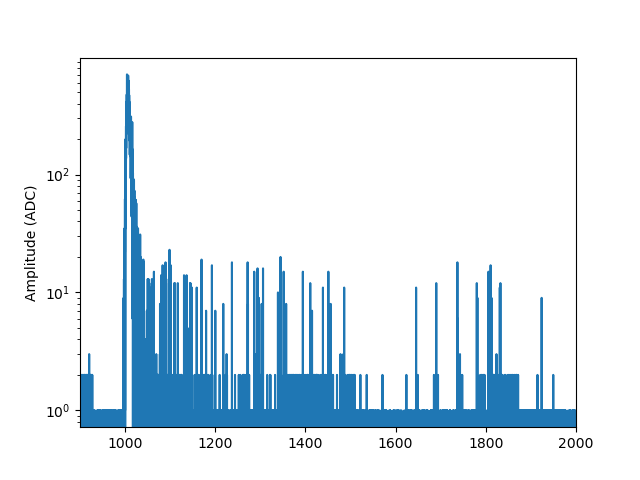

In [25]:
%matplotlib widget

plt.figure()

plt.plot(t_pmt , wfms[15][0] , label = "PMT");
plt.ylabel("Amplitude (ADC)")


# wf_blr_sum  = sum_wf( wfms[1])
# plt.hist(t_pmt , weights=wfms[1][43], bins = np.linspace(1585,1650,100), label = "PMT");
# plt.ylabel("Amplitude (ADC)")
# plt.semilogx()
plt.semilogy()
plt.xlim(900,2000)